In [0]:
"""5_Kaggle_Submission.ipynb contains the necessary code to preprocess the 
test data as well and feed it into our trained models, which would then make
predictions for it. The table generated from this code would then be submitted
to our kaggle compentition to confirm our results on the test set."""

import numpy as np         # numpy linear algebra
import sklearn as sk       # sklearn machine learning
from sklearn.model_selection import train_test_split # sklearn dataset partition tool
from sklearn import preprocessing  # sklearn data standardization tool
from sklearn import linear_model # sklearn linear regression model
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool

# Mount Google Drive to Collaboratory
from google.colab import drive 
drive.mount('/content/gdrive')

# The warnings generated can be a nuisance, so we'll turn them off.
import warnings  
warnings.filterwarnings('ignore')

# Import train.csv as a Pandas data frame
train_data = pd.read_csv('gdrive/Team Drives/CMPS 144/Dataset/train.csv', sep=',')
# Import test.csv as a Pandas data frame
test_data = pd.read_csv('gdrive/Team Drives/CMPS 144/Dataset/test.csv', sep=',') # Does not contains SalePrice Column (Labels)

# Dimensions of dataset
print('train_data.shape =', train_data.shape)

# Summary of dataset
print(train_data.info())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
train_data.shape = (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt       

- Summary statistics for the sale price.
- test_data['CentralAir'].describe()
- SalePrice histogram.
- sns.distplot(test_data['CentralAir'])

In [0]:
# Data Preparation

# Insert SalePrice as the first column
col = train_data['SalePrice']
train_data = train_data.drop('SalePrice', axis = 1)
train_data.insert(loc=0, column='SalePrice', value=col)

# Map non-numeric input variables to features
"""One hot encode categorical data, otherwise integer encode;
Integer encode data that shows an order (i.e. rating)"""

# Integer Encoder
label_encoder = preprocessing.LabelEncoder() # encodes non-numeric values to integer values

# One hot Encoder
# input: pandas series
# output: one hot encoded pandas series
def one_hot_encode(data_frame, column_name):
  encoded = pd.get_dummies(data_frame[column_name])
  data_frame = data_frame.drop(column_name, axis = 1)
  data_frame = data_frame.join(encoded)
  return data_frame

# MSZoning: Integer Encode
train_data['MSZoning'] = label_encoder.fit_transform(train_data['MSZoning'])

# LotFrontage: Fill NaN entries
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(0)

# Street Feature: Integer Encode
train_data['Street'] = label_encoder.fit_transform(train_data['Street'])

# Alley Feature: Integer Encode
train_data['Alley'] = train_data['Alley'].fillna('NA')
train_data['Alley'] = label_encoder.fit_transform(train_data['Alley'])

# LotShape: Integer Encode
train_data['LotShape'] = label_encoder.fit_transform(train_data['LotShape'])

# LandContour: One Hot Encode
train_data = one_hot_encode(train_data, 'LandContour')

# Utilities: Integer Encode
train_data['Utilities'] = label_encoder.fit_transform(train_data['Utilities'])

# LotConfig: Integer Encode
train_data['LotConfig'] = label_encoder.fit_transform(train_data['LotConfig'])

# LandSlope: Integer Encode
train_data['LandSlope'] = label_encoder.fit_transform(train_data['LandSlope'])

# Neighborhood: One Hot Encode
train_data = one_hot_encode(train_data, 'Neighborhood')

# Condition1: Integer Encode
train_data['Condition1'] = label_encoder.fit_transform(train_data['Condition1'])

# Condition2: Integer Encode
train_data['Condition2'] = label_encoder.fit_transform(train_data['Condition2'])

# BldgType: Integer Encode
train_data['BldgType'] = label_encoder.fit_transform(train_data['BldgType'])

# HousingStyle: Integer Encode
train_data['HouseStyle'] = label_encoder.fit_transform(train_data['HouseStyle'])

# RoofStyle: Integer Encode
train_data['RoofStyle'] = label_encoder.fit_transform(train_data['RoofStyle'])

# RoofMatl: Integer Encode
train_data['RoofMatl'] = label_encoder.fit_transform(train_data['RoofMatl'])

# Exterior1st: Integer Encode
train_data['Exterior1st'] = label_encoder.fit_transform(train_data['Exterior1st'])

# Exterior2nd: Integer Encode
train_data['Exterior2nd'] = label_encoder.fit_transform(train_data['Exterior2nd'])

# MasVnrType: Fill NaN entries
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['MasVnrType'] = label_encoder.fit_transform(train_data['MasVnrType'])

# MasVnrArea: Fill NaN entries
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

# ExterQual: Integer Encode
train_data['ExterQual'] = label_encoder.fit_transform(train_data['ExterQual'])

# ExterCond: Integer Encode
train_data['ExterCond'] = label_encoder.fit_transform(train_data['ExterCond'])

# Foundation: Integer Encode
train_data['Foundation'] = label_encoder.fit_transform(train_data['Foundation'])

# BsmtQual: Fill NaN entries and Integer Encode
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('NA')
train_data['BsmtQual'] = label_encoder.fit_transform(train_data['BsmtQual'])

# BsmtCond: Fill NaN entries and Integer Encode
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('NA')
train_data['BsmtCond'] = label_encoder.fit_transform(train_data['BsmtCond'])

# BsmtExposure: Fill NaN entries and Integer Encode
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
train_data['BsmtExposure'] = label_encoder.fit_transform(train_data['BsmtExposure'])

# BsmtFinType1: Fill NaN entries and Integer Encode
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
train_data['BsmtFinType1'] = label_encoder.fit_transform(train_data['BsmtFinType1'])

# BsmtFinType2: Fill NaN entries and Integer Encode
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
train_data['BsmtFinType2'] = label_encoder.fit_transform(train_data['BsmtFinType2'])

# Heating: One Hot Encode
train_data = one_hot_encode(train_data, 'Heating')

# HeatingQC: Integer Encode
train_data['HeatingQC'] = label_encoder.fit_transform(train_data['HeatingQC'])

# CentralAir: Integer Encode
train_data['CentralAir'] = label_encoder.fit_transform(train_data['CentralAir'])

# Electrical: Fill NaN entries and Integer Encode
train_data['Electrical'] = train_data['Electrical'].fillna('FuseA')
train_data['Electrical'] = label_encoder.fit_transform(train_data['Electrical'])

# KitchenQual: Integer Encode
train_data['KitchenQual'] = label_encoder.fit_transform(train_data['KitchenQual'])

# Functional: Integer Encode
train_data['Functional'] = label_encoder.fit_transform(train_data['Functional'])

# FireplaceQu: Fill NaN entries and Integer Encode
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
train_data['FireplaceQu'] = label_encoder.fit_transform(train_data['FireplaceQu'])

# GarageType: Fill NaN entries and Integer Encode
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
train_data['GarageType'] = label_encoder.fit_transform(train_data['GarageType'])

# GarageFinish: Fill NaN entries and Integer Encode
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
train_data['GarageFinish'] = label_encoder.fit_transform(train_data['GarageFinish'])

# GarageQual: Fill NaN entries and Integer Encode
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
train_data['GarageQual'] = label_encoder.fit_transform(train_data['GarageQual'])

# GarageCond: Fill NaN entries and Integer Encode
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
train_data['GarageCond'] = label_encoder.fit_transform(train_data['GarageCond'])

# PavedDrive: Integer Encode
train_data['PavedDrive'] = label_encoder.fit_transform(train_data['PavedDrive'])

# PoolQC: Fill NaN entries and Integer Encode
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')
train_data['PoolQC'] = label_encoder.fit_transform(train_data['PoolQC'])

# Fence: Fill NaN entries and Integer Encode
train_data['Fence'] = train_data['Fence'].fillna('NA')
train_data['Fence'] = label_encoder.fit_transform(train_data['Fence'])

# SaleType: Integer Encode
train_data['SaleType'] = label_encoder.fit_transform(train_data['SaleType'])

# SaleCondition: Integer Encode
train_data['SaleCondition'] = label_encoder.fit_transform(train_data['SaleCondition'])


print(train_data.info())
print(list(train_data.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 113 entries, SalePrice to Wall
dtypes: float64(3), int64(74), object(1), uint8(35)
memory usage: 939.7+ KB
None
['SalePrice', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish'

In [0]:
# Feature Engineer
current_year = []
for i in range(len(train_data['YearRemodAdd'])):
  current_year.append(2019)
train_data['AreaPerRoom'] = (train_data['GrLivArea'])/train_data['TotRmsAbvGrd']
train_data['AgeOfHouse'] = current_year - train_data['YearBuilt']
train_data['TotalPorchArea'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch']

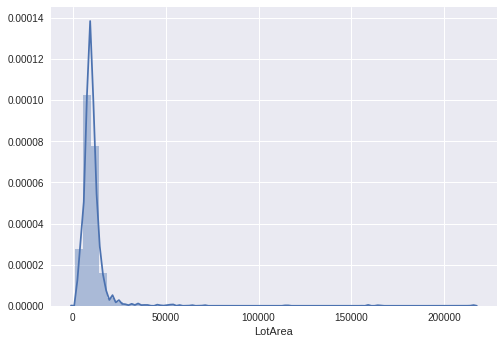

In [0]:
# Data Transformation

# Log scale LotArea
sns.distplot(train_data['LotArea'])
train_data['LotArea'] = np.log(train_data['LotArea'])

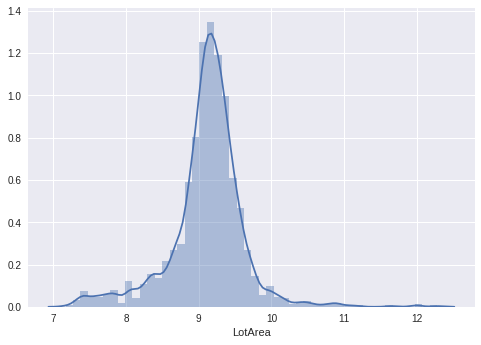

In [0]:
sns.distplot(train_data['LotArea'])

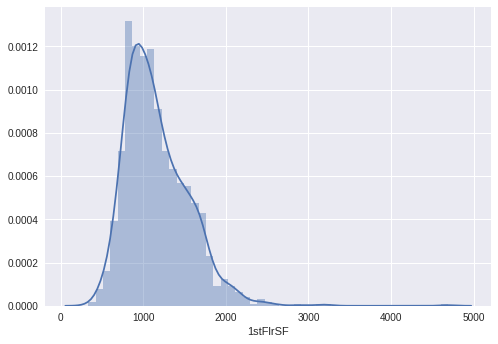

In [0]:
# Log scale 1stFlrSF
sns.distplot(train_data['1stFlrSF'])
train_data['1stFlrSF'] = np.log(train_data['1stFlrSF'])

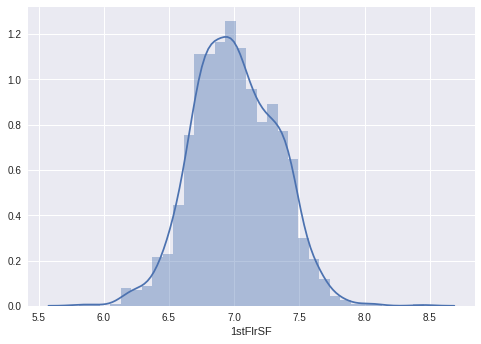

In [0]:
sns.distplot(train_data['1stFlrSF'])

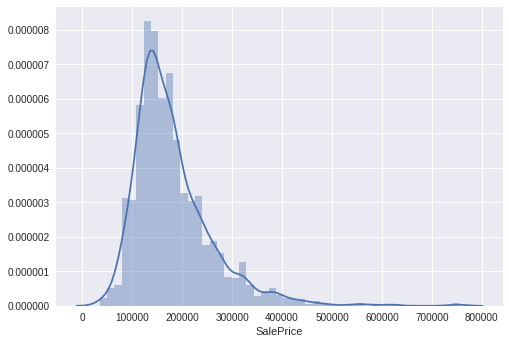

In [0]:
# Log scale SalePrice
sns.distplot(train_data['SalePrice'])
train_data["SalePrice"] = np.log(train_data["SalePrice"])

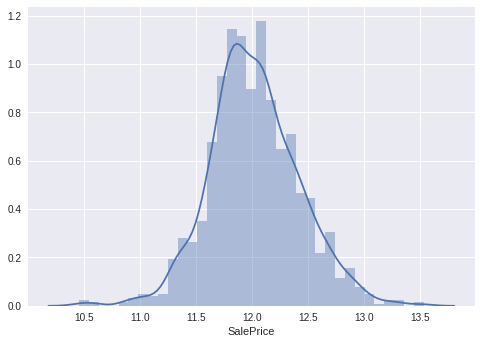

In [0]:
sns.distplot(train_data['SalePrice'])

In [0]:
# Drop Unecessary Features

columns_to_drop = []
# Dropping features that are of highly correlated pairs
columns_to_drop.append('GarageYrBlt')
columns_to_drop.append('MSSubClass')
columns_to_drop.append('Functional')

# Dropping obscure features       
columns_to_drop.append('LowQualFinSF')
columns_to_drop.append('GarageCond')
columns_to_drop.append('MoSold')

# Dropping features with zero correlation to SalePrice
columns_to_drop.append('LotConfig')
columns_to_drop.append('Utilities')
columns_to_drop.append('Condition2')
columns_to_drop.append('MasVnrType')
columns_to_drop.append('BsmtHalfBath')
columns_to_drop.append('Street')

# Dropping features that negatively affect R^2
columns_to_drop.append('LotFrontage')
columns_to_drop.append('MiscFeature')
columns_to_drop.append('YearBuilt')

train_data = train_data.drop(columns=columns_to_drop)

In [0]:
# Find all rows where the GrLivArea is greater than 4500.
np.where(train_data['GrLivArea'] > 4500)

(array([ 523, 1298]),)

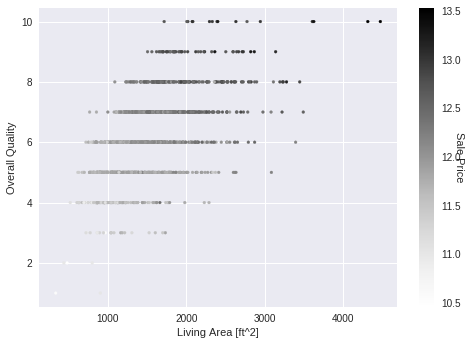

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 101 entries, SalePrice to TotalPorchArea
dtypes: float64(5), int64(61), uint8(35)
memory usage: 853.0 KB
None


In [0]:
# Delete these two outlier rows.
train_data = train_data.drop(list(np.where(train_data['GrLivArea'] > 4500)[0]), axis=0)   # axis=0 indicates a row

# Replot the scatterplot.
plt.scatter(x = 'GrLivArea', 
            y = 'OverallQual', 
            c = 'SalePrice', 
            data = train_data,
            s = 8)   # dot size
plt.xlabel('Living Area [ft^2]')
plt.ylabel('Overall Quality')
cbar = plt.colorbar()
cbar.set_label('Sale Price', rotation=270)
plt.show()

print(train_data.info())

In [0]:
# Training the Model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import ensemble

# Linear Regression Model
cols = train_data.columns.tolist()[2:] # 0 is SalePrice Column, 1 is Index Column
X = train_data[cols]
Y = train_data['SalePrice']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.2, random_state=0)

lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train, Y_train)

print('Linear Regression Model:')
print('Training set R^2 =', lm_model.score(X_train, Y_train))   #0.9299660855502043
print('Validation set R^2 =', lm_model.score(X_validation, Y_validation))    #0.9309144304686323

# Check RMSE
print('Train RMSE =', sqrt(mean_squared_error(Y_train, lm_model.predict(X_train))))   #0.10489138528329446
print('Validation RMSE =', sqrt(mean_squared_error(Y_validation, lm_model.predict(X_validation))))     #0.10820465141433512

# ElasticNet Regression

from sklearn.linear_model import ElasticNet, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
enet_model = ENet.fit(X_train, Y_train)

print('\n')
print('ElasticNet Regression:')
print('Training set R^2 =', enet_model.score(X_train, Y_train))  #0.9273710980827758
print('Validation set R^2 =', enet_model.score(X_validation, Y_validation))    #0.9332113429617891

# Check RMSE
print('Train RMSE =', sqrt(mean_squared_error(Y_train, enet_model.predict(X_train))))    #0.1068169958233685
print('Validation RMSE =', sqrt(mean_squared_error(Y_validation, enet_model.predict(X_validation))))     #0.10639068733024451

# Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso_model = lasso.fit(X_train, Y_train)

print('\n')
print('Lasso Regression:')
print('Training set R^2 =', lasso_model.score(X_train, Y_train))  #0.9269202477282604
print('Validation set R^2 =', lasso_model.score(X_validation, Y_validation))   #0.9332558940683002

# Check RMSE
print('Train RMSE =', sqrt(mean_squared_error(Y_train, lasso_model.predict(X_train))))    #0.10714802089209326
print('Validation RMSE =', sqrt(mean_squared_error(Y_validation, lasso_model.predict(X_validation))))     #0.10635519766974705

Linear Regression Model:
Training set R^2 = 0.9299660855502043
Validation set R^2 = 0.9309144304686323
Train RMSE = 0.10489138528329446
Validation RMSE = 0.10820465141433512


ElasticNet Regression:
Training set R^2 = 0.9273710980827758
Validation set R^2 = 0.9332113429617891
Train RMSE = 0.1068169958233685
Validation RMSE = 0.10639068733024451


Lasso Regression:
Training set R^2 = 0.9269202477282604
Validation set R^2 = 0.9332558940683002
Train RMSE = 0.10714802089209326
Validation RMSE = 0.10635519766974705


##Prepare Test Data

In [0]:
# Dimensions of dataset
print('test_data.shape =', test_data.shape)

# Data Preparation

# MSZoning: Integer Encode
test_data['MSZoning'] = label_encoder.fit_transform(test_data['MSZoning'].astype(str))

# LotFrontage: Fill NaN entries
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(0)

# Street Feature: Integer Encode
test_data['Street'] = label_encoder.fit_transform(test_data['Street'])

# Alley Feature: Integer Encode
test_data['Alley'] = test_data['Alley'].fillna('NA')
test_data['Alley'] = label_encoder.fit_transform(test_data['Alley'])

# LotShape: Integer Encode
test_data['LotShape'] = label_encoder.fit_transform(test_data['LotShape'])

# LandContour: One Hot Encode
test_data = one_hot_encode(test_data, 'LandContour')

# Utilities: Integer Encode
test_data['Utilities'] = label_encoder.fit_transform(test_data['Utilities'].astype(str))

# LotConfig: Integer Encode
test_data['LotConfig'] = label_encoder.fit_transform(test_data['LotConfig'])

# LandSlope: Integer Encode
test_data['LandSlope'] = label_encoder.fit_transform(test_data['LandSlope'])

# Neighborhood: One Hot Encode
test_data = one_hot_encode(test_data, 'Neighborhood')

# Condition1: Integer Encode
test_data['Condition1'] = label_encoder.fit_transform(test_data['Condition1'])

# Condition2: Integer Encode
test_data['Condition2'] = label_encoder.fit_transform(test_data['Condition2'])

# BldgType: Integer Encode
test_data['BldgType'] = label_encoder.fit_transform(test_data['BldgType'])

# HousingStyle: Integer Encode
test_data['HouseStyle'] = label_encoder.fit_transform(test_data['HouseStyle'])

# RoofStyle: Integer Encode
test_data['RoofStyle'] = label_encoder.fit_transform(test_data['RoofStyle'])

# RoofMatl: Integer Encode
test_data['RoofMatl'] = label_encoder.fit_transform(test_data['RoofMatl'])

# Exterior1st: Integer Encode
test_data['Exterior1st'] = label_encoder.fit_transform(test_data['Exterior1st'].astype(str))

# Exterior2nd: Integer Encode
test_data['Exterior2nd'] = label_encoder.fit_transform(test_data['Exterior2nd'].astype(str))

# MasVnrType: Fill NaN entries
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')
test_data['MasVnrType'] = label_encoder.fit_transform(test_data['MasVnrType'])

# MasVnrArea: Fill NaN entries
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

# ExterQual: Integer Encode
test_data['ExterQual'] = label_encoder.fit_transform(test_data['ExterQual'])

# ExterCond: Integer Encode
test_data['ExterCond'] = label_encoder.fit_transform(test_data['ExterCond'])

# Foundation: Integer
test_data['Foundation'] = label_encoder.fit_transform(test_data['Foundation'])

# BsmtQual: Fill NaN entries and Integer Encode
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtQual'] = label_encoder.fit_transform(test_data['BsmtQual'])

# BsmtCond: Fill NaN entries and Integer Encode
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')
test_data['BsmtCond'] = label_encoder.fit_transform(test_data['BsmtCond'])

# BsmtExposure: Fill NaN entries and Integer Encode
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')
test_data['BsmtExposure'] = label_encoder.fit_transform(test_data['BsmtExposure'])

# BsmtFinType1: Fill NaN entries and Integer Encode
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType1'] = label_encoder.fit_transform(test_data['BsmtFinType1'])

# BsmtFinType2: Fill NaN entries and Integer Encode
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')
test_data['BsmtFinType2'] = label_encoder.fit_transform(test_data['BsmtFinType2'])

# BsmtFinSF1: Fill NaN entries
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(0)

# BsmtFinSF2: Fill NaN entries
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(0)

# BsmtUnfSF: Fill NaN entries
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(0)

# TotalBsmtSF: Fill NaN entries
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(0)

# Heating: One Hot Encode
test_data = one_hot_encode(test_data, 'Heating')

# HeatingQC: Integer Encode
test_data['HeatingQC'] = label_encoder.fit_transform(test_data['HeatingQC'])

# CentralAir: Integer Encode
test_data['CentralAir'] = label_encoder.fit_transform(test_data['CentralAir'])

# Electrical: Fill NaN entries and Integer Encode
test_data['Electrical'] = test_data['Electrical'].fillna('FuseA')
test_data['Electrical'] = label_encoder.fit_transform(test_data['Electrical'])

# BsmtFullBath: Fill NaN entries
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(0)

# BsmtHalfBath: Fill NaN entries
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(0)

# KitchenQual: Integer Encode
test_data['KitchenQual'] = label_encoder.fit_transform(test_data['KitchenQual'].astype(str))

# Functional: Integer Encode
test_data['Functional'] = label_encoder.fit_transform(test_data['Functional'].astype(str))

# FireplaceQu: Fill NaN entries and Integer Encode
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')
test_data['FireplaceQu'] = label_encoder.fit_transform(test_data['FireplaceQu'])

# GarageType: Fill NaN entries and Integer Encode
test_data['GarageType'] = test_data['GarageType'].fillna('NA')
test_data['GarageType'] = label_encoder.fit_transform(test_data['GarageType'])

# GarageFinish: Fill NaN entries and Integer Encode
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('NA')
test_data['GarageFinish'] = label_encoder.fit_transform(test_data['GarageFinish'])

# GarageCars: Fill NaN entries
test_data['GarageCars'] = test_data['GarageCars'].fillna(0)

# GarageArea: Fill NaN entries
test_data['GarageArea'] = test_data['GarageArea'].fillna(0)

# GarageQual: Fill NaN entries and Integer Encode
test_data['GarageQual'] = test_data['GarageQual'].fillna('NA')
test_data['GarageQual'] = label_encoder.fit_transform(test_data['GarageQual'])

# GarageCond: Fill NaN entries and Integer Encode
test_data['GarageCond'] = test_data['GarageCond'].fillna('NA')
test_data['GarageCond'] = label_encoder.fit_transform(test_data['GarageCond'])

# PavedDrive: Integer Encode
test_data['PavedDrive'] = label_encoder.fit_transform(test_data['PavedDrive'])

# PoolQC: Fill NaN entries and Integer Encode
test_data['PoolQC'] = test_data['PoolQC'].fillna('NA')
test_data['PoolQC'] = label_encoder.fit_transform(test_data['PoolQC'])

# Fence: Fill NaN entries and Integer Encode
test_data['Fence'] = test_data['Fence'].fillna('NA')
test_data['Fence'] = label_encoder.fit_transform(test_data['Fence'])

# SaleType: Integer Encode
test_data['SaleType'] = label_encoder.fit_transform(test_data['SaleType'].astype(str))

# SaleCondition: Integer Encode
test_data['SaleCondition'] = label_encoder.fit_transform(test_data['SaleCondition'])

# For test data fill-in missing columns
test_data.insert(test_data.columns.get_loc('Wall'), 'OthW', 0) 
test_data.insert(test_data.columns.get_loc('GasA'), 'Floor', 0) 

print(test_data.info())
print(list(test_data.columns))


test_data.shape = (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 112 entries, Id to Wall
dtypes: float64(11), int64(67), object(1), uint8(33)
memory usage: 947.6+ KB
None
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'Gar

In [0]:
# Feature Engineer
current_year = []
for i in range(len(test_data['YearRemodAdd'])):
  current_year.append(2019)
test_data['AreaPerRoom'] = (test_data['GrLivArea'])/test_data['TotRmsAbvGrd']
test_data['AgeOfHouse'] = current_year - test_data['YearBuilt']
test_data['TotalPorchArea'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch'] + test_data['ScreenPorch']

In [0]:
# Data Transformation

# LotArea histogram
test_data['LotArea'] = np.log(test_data['LotArea'])

# 1stFlrSF histogram
test_data['1stFlrSF'] = np.log(test_data['1stFlrSF'])

In [0]:
# Drop Unecessary Features

test_data.head()

columns_to_drop = []
#dropping features that are of highly correlated pairs
columns_to_drop.append('GarageYrBlt')
columns_to_drop.append('MSSubClass')
columns_to_drop.append('Functional')

#not features people usually look at
# columns_to_drop.append('MSZoning')         
columns_to_drop.append('LowQualFinSF')
columns_to_drop.append('GarageCond')
columns_to_drop.append('MoSold')

#dropping features with zero correlation to saleprice
columns_to_drop.append('LotConfig')
columns_to_drop.append('Utilities')
columns_to_drop.append('Condition2')
columns_to_drop.append('MasVnrType')
columns_to_drop.append('BsmtHalfBath')
columns_to_drop.append('Street')

# Negatively Affects R^2
columns_to_drop.append('LotFrontage')
columns_to_drop.append('MiscFeature')
columns_to_drop.append('YearBuilt')

test_data = test_data.drop(columns=columns_to_drop)

In [0]:
# Make predictions using test set
cols = test_data.columns.tolist()[1:] # 0 is Index Column
X = test_data[cols]

# For Kaggle Submission, we submitted the results from our Lasso Regression Model
data = {'Id': test_data['Id'], 'SalePrice': np.exp(lasso_model.predict(X))}
df = pd.DataFrame(data)
print(df)

# The commentted out code below stores the results onto our team drive
# df.to_csv('gdrive/Team Drives/CMPS 144/Dataset/Lasso_Kaggle_SalePrice_Submission.csv',index = False)

        Id      SalePrice
0     1461  117354.478858
1     1462  160167.152087
2     1463  175361.935466
3     1464  197309.731122
4     1465  199704.368796
5     1466  166674.226048
6     1467  180661.984190
7     1468  159559.595062
8     1469  192782.771163
9     1470  112960.269457
10    1471  185268.647711
11    1472   98364.557119
12    1473   93052.497985
13    1474  140839.492664
14    1475  110382.061371
15    1476  352408.351852
16    1477  239155.372949
17    1478  289898.645667
18    1479  284814.135719
19    1480  484813.259463
20    1481  318737.794418
21    1482  205791.517776
22    1483  176899.795663
23    1484  160153.851583
24    1485  184454.011483
25    1486  192602.126023
26    1487  315449.880803
27    1488  239262.097907
28    1489  191054.938642
29    1490  234573.926935
...    ...            ...
1429  2890   80182.864167
1430  2891  131389.689760
1431  2892   60275.776301
1432  2893   84705.733415
1433  2894   65978.876916
1434  2895  322452.215058
1435  2896  